In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
dataset_dir = 'dataset'

In [4]:
image_size = (128, 128)  
batch_size = 32

In [5]:
datagen = ImageDataGenerator(rescale=1./255) 

In [6]:
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 584 images belonging to 5 classes.


In [7]:
X = []
y = []


In [8]:
for imgs, labels in data_generator:
    for img, label in zip(imgs, labels):
        X.append(img.flatten())  
        y.append(np.argmax(label))  
    if len(X) >= data_generator.samples:  
        break

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
xgb_model = XGBClassifier(
    n_estimators=7,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric=['mlogloss']
)

In [83]:
eval_set = [(X_train, y_train), (X_test, y_test)]  
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.40780	validation_1-mlogloss:1.46780
[1]	validation_0-mlogloss:1.23980	validation_1-mlogloss:1.33996
[2]	validation_0-mlogloss:1.09824	validation_1-mlogloss:1.24001
[3]	validation_0-mlogloss:0.97927	validation_1-mlogloss:1.15219
[4]	validation_0-mlogloss:0.87709	validation_1-mlogloss:1.08507
[5]	validation_0-mlogloss:0.78798	validation_1-mlogloss:1.02577
[6]	validation_0-mlogloss:0.71008	validation_1-mlogloss:0.96872


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
# xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.87      0.89        23
           2       0.88      0.78      0.82        18
           3       0.81      0.88      0.85        25
           4       1.00      1.00      1.00        24

    accuracy                           0.89       117
   macro avg       0.89      0.88      0.89       117
weighted avg       0.89      0.89      0.89       117



In [86]:
# Calculate accuracy manually
train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

In [87]:
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 1.0
Test Accuracy: 0.8888888888888888


In [88]:
results = xgb_model.evals_result()

In [89]:
print(results.keys()) 

dict_keys(['validation_0', 'validation_1'])


In [90]:
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

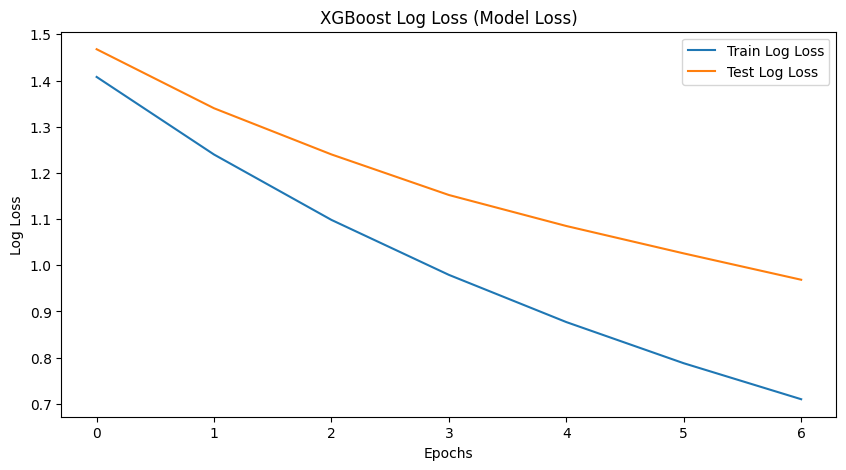

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test Log Loss')
plt.title('XGBoost Log Loss (Model Loss)')
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

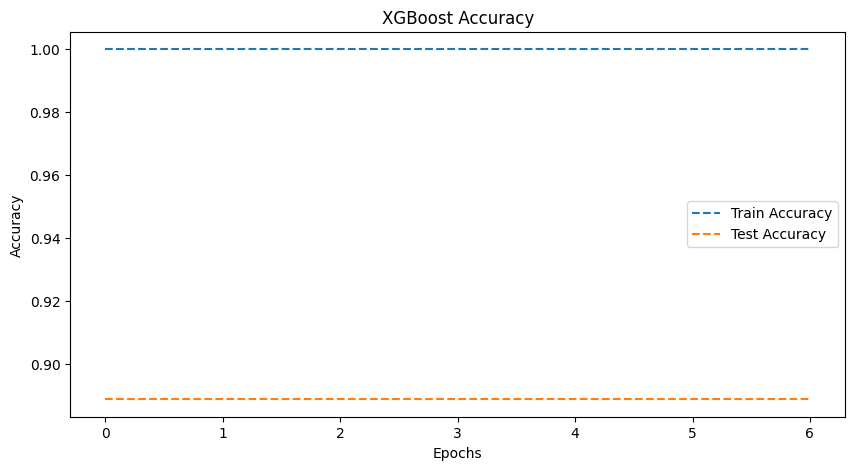

In [92]:
plt.figure(figsize=(10, 5))
plt.plot([0, epochs-1], [train_acc, train_acc], label='Train Accuracy', linestyle='--')
plt.plot([0, epochs-1], [test_acc, test_acc], label='Test Accuracy', linestyle='--')
plt.title('XGBoost Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()